In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# generate random dataset

X = 2*np.random.rand(200)
y = (2*X +3) + np.random.rand(200)

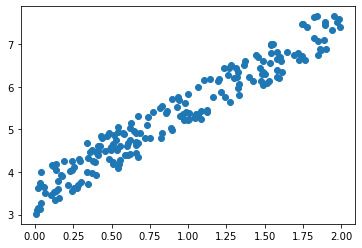

In [5]:
plt.scatter(X,y)
plt.show()

In above equation i used slope=2 and intercept=3

## Optimize parameters using Normal Form Eqation


params = (X.T * X)-1 * (X.T * y)

In [9]:
X_b = np.c_[np.ones((200, 1)), X] 
X_b[10]

array([1.        , 1.74452828])

In [10]:
# use np.linalg to find inverse of matrix

params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
params

array([3.49470298, 2.0012604 ])

In [13]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_hat = X_new_b.dot(params)
y_hat

array([3.49470298, 7.49722377])

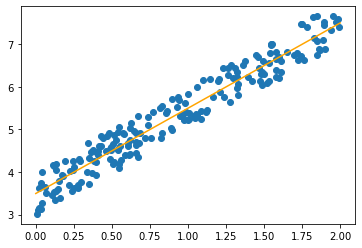

In [14]:
plt.scatter(X,y)
plt.plot(X_new, y_hat, color='orange')
plt.show()

# Gradient Descent

### Batch Gradeint Descent

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters.

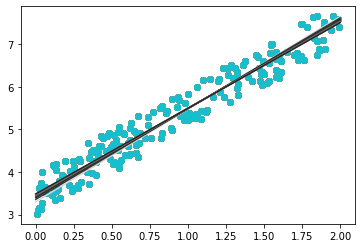

In [44]:
batch_cost = []
slope = []
intercept = []

m=2
b=3
n = len(X)
learning_rate = 0.01
j = 100
for i in range(1,1001):
    y_pred = X*m +b
    
    mse = np.mean(np.square(y-y_pred))
    batch_cost.append(mse)
    
    m_d = -(2/n)*sum(X*(y-y_pred))
    b_d = -(2/n)*sum(y-y_pred)
    
    m = m - learning_rate*m_d
    b = b - learning_rate*b_d
    
    if i==j:
        j=i+100
        X_new = np.array([[0],[2]])
        y_pred = m*X_new + b
        
        plt.scatter(X,y)
        plt.plot(X_new,y_pred,color=str(round(np.random.rand(1)[0],2)))
    
    
    slope.append(m)
    intercept.append(b)    
    
#     print(f'Slope {m}, Intercept: {b} and MSE: {mse}')

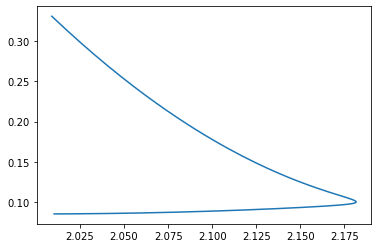

In [45]:
plt.plot(slope, batch_cost)
plt.show()

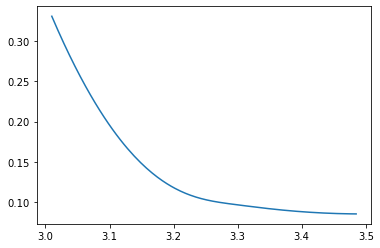

In [46]:
plt.plot(intercept,batch_cost)
plt.show()

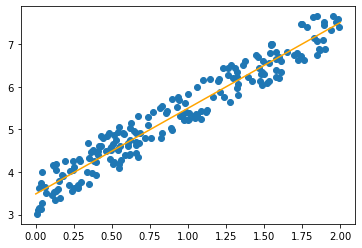

In [47]:
X_new = np.array([[0],[2]])
y_new = m*X_new + b

plt.scatter(X,y)
plt.plot(X_new,y_new,color='orange')
plt.show()

### Stochaistic Gradient Descent

Here we only use a random instance from data, calculate its gradients and update it. We use this approach when the dataset is too large because Batch Gradient Descent take too much time.

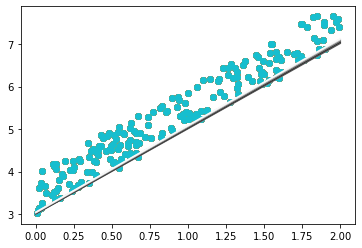

In [50]:
sgd_cost = []
slope = []
intercept = []

m=2
b=3
n = len(X)
learning_rate = 0.01
j=100
for i in range(1,1001):
    # Add Stochaisticity
    
    idx = np.random.randint(0,n-1)
    _x = X[idx]
    _y = y[idx]
    y_pred = _x*m +b
    
    mse = np.square(_y- y_pred)
    sgd_cost.append(mse)
    
    
    m_d = -(2/n)*(_x*(_y - y_pred))
    b_d = -(2/n)*(_y - y_pred)
                  
    m = m - learning_rate*m_d
    b = b - learning_rate*b_d
                 
    if i==j:
        j=i+100
        X_new = np.array([[0],[2]])
        y_pred = m*X_new + b
        
        plt.scatter(X,y)
        plt.plot(X_new,y_pred,color=str(round(np.random.rand(1)[0],2)))
    
    slope.append(m)
    intercept.append(b)
#     print(f'Slope {m}, Intercept: {b} and MSE: {mse}')

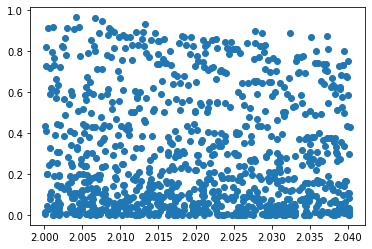

In [51]:
plt.scatter(slope,sgd_cost)
plt.show()

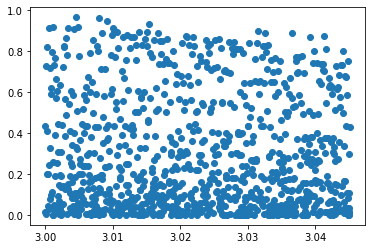

In [52]:
plt.scatter(intercept,sgd_cost)
plt.show()

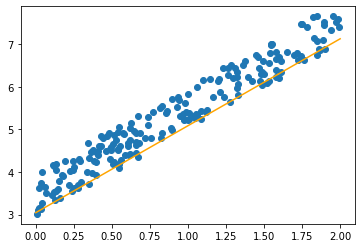

In [53]:
X_new = np.array([[0],[2]])
y_new = m*X_new + b

plt.scatter(X,y)
plt.plot(X_new,y_new,color='orange')
plt.show()

### Mini Batch Gradient Descent

In this approach we use batches from our dataset to calculate the gradients and Update them. Here we also don't need to include all the data points from Dataset to calculate the Gradients

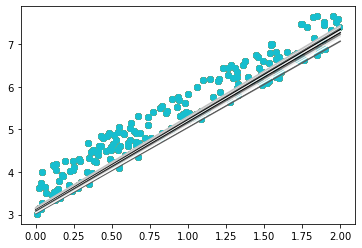

In [55]:
mini_batch_cost = []
slope = []
intercept = []

m=2
b=3

n = len(X)
learning_rate = 0.01
j =100
for i in range(1,1001):
    # Add Stochaisticity
    
    idx = np.random.randint(0,n-1,size=5)
    _x = X[idx]
    _y = y[idx]
    y_pred = _x*m +b
    
    mse = np.mean(np.square(_y-y_pred))
#     print(mse)
    mini_batch_cost.append(mse)
    
    
    m_d = -(2/n)*sum(_x*(_y - y_pred))
    b_d = -(2/n)*sum(_y - y_pred)
                  
    m = m - learning_rate*m_d
    b = b - learning_rate*b_d
                 
    if i==j:
        j=i+100
        X_new = np.array([[0],[2]])
        y_pred = m*X_new + b
        
        plt.scatter(X,y)
        plt.plot(X_new,y_pred,color=str(round(np.random.rand(1)[0],2)))
    
    slope.append(m)
    intercept.append(b)
#     print(f'Slope {m}, Intercept: {b} and MSE: {mse}')


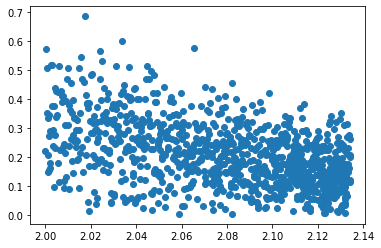

In [56]:
plt.scatter(slope,mini_batch_cost)
plt.show()

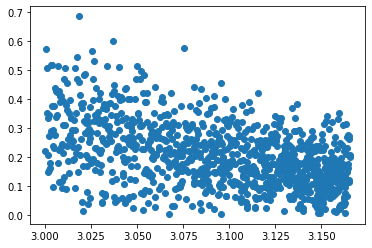

In [57]:
plt.scatter(intercept,mini_batch_cost)
plt.show()

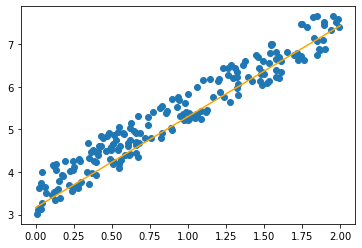

In [58]:
X_new = np.array([[0],[2]])
y_new = m*X_new + b

plt.scatter(X,y)
plt.plot(X_new,y_new,color='orange')
plt.show()